<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
X_train.shape

2113536/2110848 [==============================] - 0s 0us/step


ValueError: Object arrays cannot be loaded when allow_pickle=False

In [ ]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 32
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print(y_train.shape)

print('Build model...')
# TODO - your code!

y_train.max()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

In [ ]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it? Why do you need it?*

I don't fully understand the theory behind it but it increases the dimensions of the data, accoding to the documentation this is done by a 'time step' which has to do with the length of each entry in the data. I believe that this is a form of normalization so that all the data is the same shape before its passed through the model

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

the advantage of LSTMs is that they can put more weight on short term events while not completely loosing the older information as opposed to a traditional rnn which only has access to its previous step

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Text Generation: 
text is inherintly ordered data which means that the lstm can learn the orders that are common and make predictions accoringly. 

time series data: 
anything that has to do with predicting what will come next based on what previously came will take advantage of the LSTM and RNN's ability to recall previous events 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [3]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 16.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for google-images-download ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://img-aws.ehowcdn.com/350x235p/photos.demandstudios.com/getty/article/110/213/78036715_XS.jpg
Completed Image ====> 1.78036715_XS.jpg
Image URL: https://www.maxpixel.net/static/photo/1x/Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Completed Image ====> 2.Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Image URL: https://c8.alamy.com/comp/C63A50/green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Completed Image ====> 3.green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Image URL: https://cdn.pixabay.com/photo/2018/07/29/16/11/water-lilies-3570439_960_720.jpg
Completed Image ====> 4.water-lilies-3570439_960_720.jpg
Image URL: https://c8.alamy.com/comp/C63A4K/green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with-pink-flowers-C63A4K.jpg
Completed Image ====> 5.green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with

In [4]:
#I want a shorter variable name
frogs=absolute_image_paths

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [1]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path` function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'bullfrog' or entry[1]== 'tree_frog' or entry[1]== 'tailed_frog':
            return entry[2]
    return 0.0


#img_contains_frog(process_img_path(frogs[0]['lilly frog pond'][0]))

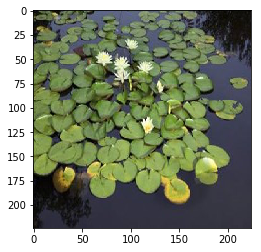

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[('n04409515', 'tennis_ball', 0.8045481), ('n03991062', 'pot', 0.19152239), ('n01737021', 'water_snake', 0.0010916113)]
0.0


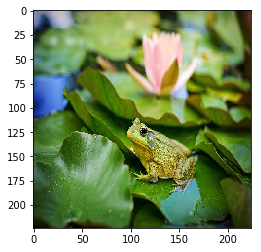

[('n01644373', 'tree_frog', 0.92792386), ('n01644900', 'tailed_frog', 0.03936985), ('n01641577', 'bullfrog', 0.022811396)]
0.92792386


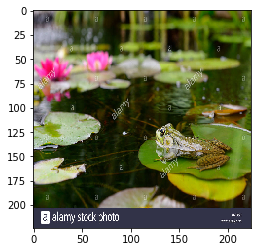

[('n01641577', 'bullfrog', 0.49306068), ('n01667778', 'terrapin', 0.2044394), ('n01698640', 'American_alligator', 0.17512263)]
0.49306068


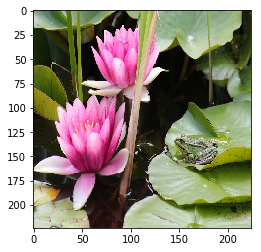

[('n02206856', 'bee', 0.32895058), ('n11939491', 'daisy', 0.0826889), ('n03991062', 'pot', 0.066997364)]
0.0


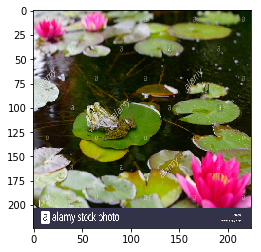

[('n01641577', 'bullfrog', 0.7856794), ('n01737021', 'water_snake', 0.14661992), ('n01698640', 'American_alligator', 0.012319412)]
0.7856794


In [7]:
for frog in frogs[0]['lilly frog pond']:
    img=image.load_img(frog, target_size=(224,224))
    imgplot = plt.imshow(img)
    plt.show()
    print(img_contains_frog(img))

#### Stretch Goal: Displaying Predictions

In [6]:
import matplotlib.pyplot as plt



<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
Autoencoders are great for building a model that encodes images, text, auido and other media that doesn't easily become a vector of numbers. It works by training up a basic feed forward model that is symetric around the middle 'encoding' and proceedes to encode then decode the data. This means that a model can work without labeled training data and work as a sort of unsupervised model. Once this has been done the autoencoder can be split in half and only the first half is used to encode data.

Because it goes through a process of being encoded then decoded it can also be used to de-noise an image or piece of audio. because it has been encoded and decoded some of the detail is nessacerily lost, and this can elimenate the unimportant details. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
I'm currently really strong in data engineering. I have a strong command of dataframe manipulation and feature engineering. Building a Data pipeline comes easily to me
- What area of Data Science would you most like to learn more about, and why?
I hate writing prose so I'm really interested in learning more about LSTMs and text generation so I don't have write out answers like this anymore :)
- Where do you think Data Science will be in 5 years?
I don't think that its realistic to make predictions about things that will happen in the next five years because so much of the field is trying things and hoping for the best. Its possible that we will see self driving cars and the beginings of an AGI, or its possible that AI will have dropped out of the limelight again because we are reaching the end of moores law and will need some advancement in hardware to keep going on AI. I think self driving cars are more likely
- What are the threats posed by AI to our society?
Simlarly I don't think that we can really predict what threats an AI might pose because bugs happen at random and have unexpected and unpredictable responses. We could build an AI that thinks its a good idea to collect flowers and then it goes off and destroys the eco system collecting *all* the flowers (as an example). I think the more realistic threats that we can actually plan for are the effects that an AI would have on society as a whole. It makes a lot of sense that we will develop an AI that will entirely put humans out of the job market, which under our current system will trigger a massive recession which may ultimately be unrecoverable to return to the world as we know it. 
- How do you think we can counteract those threats? 
I think we should be making social policy around the idea that tech is going to push us out of the market as we know it today. Theres an interesting argument in favor of swittching to communism to survive a world where people can't work, but personally I support more conservative lines of doing things like UBI, though I would be concerned about rampant inflation in a world where money doesn't have the same context of not everyone having the same ammount anymore. I write code not policy though, I would want a consultant before I actually was trying to write legislation. 
- Do you think achieving General Artifical Intelligence is ever possible?
Yes. So much of science and technology has happened by accident, we didn't discover things because we set out to look for them, so it seems like with how much the idea of an AGI fascenates society its inevitable that it will eventaully be created. Additionally 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [4]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")